<a href="https://colab.research.google.com/github/DataCrusade1999/Quantitative-Analytics/blob/master/Quantitative_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import pandas_datareader as pdr
import datetime
import pandas as pd
import io
from google.colab import files
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm


In [3]:
uploaded=files.upload()

Saving D__Important Stuff_Machine Learning Datasets_apl_ohlc.csv to D__Important Stuff_Machine Learning Datasets_apl_ohlc.csv


In [4]:
aapl=pd.read_csv(io.BytesIO(uploaded['D__Important Stuff_Machine Learning Datasets_apl_ohlc.csv']))
#aapl['diff']=aapl.Open-aapl.Close

PERFORMING EDA ON DATA

In [5]:
print(aapl.head(5))

         Date       High        Low       Open      Close     Volume  Adj Close
0  2006-10-02  10.838572  10.614285  10.728572  10.694285  178159800   9.241351
1  2006-10-03  10.707143  10.455714  10.635715  10.582857  197677200   9.145061
2  2006-10-04  10.780000  10.451428  10.585714  10.768572  207270700   9.305547
3  2006-10-05  10.880000  10.590000  10.647142  10.690000  170970800   9.237648
4  2006-10-06  10.720000  10.544286  10.631429  10.602858  116739700   9.162347


In [6]:
print(aapl.tail(5))

            Date       High        Low  ...      Close    Volume  Adj Close
1318  2011-12-23  57.655716  57.070000  ...  57.618572  67349800  49.790466
1319  2011-12-27  58.441429  57.574287  ...  58.075714  66269000  50.185513
1320  2011-12-28  58.321430  57.334286  ...  57.520000  57165500  49.705292
1321  2011-12-29  57.950001  57.215714  ...  57.874287  53994500  50.011452
1322  2011-12-30  58.040001  57.641430  ...  57.857143  44915500  49.996635

[5 rows x 7 columns]


In [7]:
print(aapl.shape)

(1323, 7)


In [8]:
print(aapl.columns)

Index(['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')


In [9]:
print(aapl.describe())

              High          Low  ...        Volume    Adj Close
count  1323.000000  1323.000000  ...  1.323000e+03  1323.000000
mean     29.237566    28.507684  ...  1.882896e+08    24.964252
std      14.199012    14.029758  ...  1.027007e+08    12.201417
min      10.568571    10.371428  ...  3.937360e+07     9.040131
25%      17.752857    17.182143  ...  1.122037e+08    15.063183
50%      25.642857    24.725714  ...  1.629866e+08    21.707180
75%      39.132858    38.351429  ...  2.316230e+08    33.442190
max      60.957142    59.427143  ...  8.432424e+08    52.124886

[8 rows x 6 columns]


In [10]:
print(aapl.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1323 entries, 0 to 1322
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1323 non-null   object 
 1   High       1323 non-null   float64
 2   Low        1323 non-null   float64
 3   Open       1323 non-null   float64
 4   Close      1323 non-null   float64
 5   Volume     1323 non-null   int64  
 6   Adj Close  1323 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 72.5+ KB
None


In [11]:
print(aapl.isnull())

       Date   High    Low   Open  Close  Volume  Adj Close
0     False  False  False  False  False   False      False
1     False  False  False  False  False   False      False
2     False  False  False  False  False   False      False
3     False  False  False  False  False   False      False
4     False  False  False  False  False   False      False
...     ...    ...    ...    ...    ...     ...        ...
1318  False  False  False  False  False   False      False
1319  False  False  False  False  False   False      False
1320  False  False  False  False  False   False      False
1321  False  False  False  False  False   False      False
1322  False  False  False  False  False   False      False

[1323 rows x 7 columns]


In [12]:
print(aapl.index)

RangeIndex(start=0, stop=1323, step=1)


In [13]:
print(aapl.iloc[[1,2], [0,2,3,4]])

         Date        Low       Open      Close
1  2006-10-03  10.455714  10.635715  10.582857
2  2006-10-04  10.451428  10.585714  10.768572


In [14]:
print(aapl.sample(20))

            Date       High        Low  ...      Close     Volume  Adj Close
1057  2010-12-13  46.437141  45.857143  ...  45.952858  109953900  39.709686
174   2007-06-13  17.312857  16.485714  ...  16.785715  430338300  14.505197
140   2007-04-25  13.628572  13.400000  ...  13.621428  296786000  11.770813
682   2009-06-18  19.714285  19.370001  ...  19.411428  106920100  16.774178
324   2008-01-16  24.144285  22.385714  ...  22.805714  553461300  19.707315
1296  2011-11-22  53.990002  52.991428  ...  53.787144  102255300  46.479584
451   2008-07-18  24.235714  23.571428  ...  23.592857  217103600  20.387510
1102  2011-02-16  52.128571  51.500000  ...  51.875713  120289400  44.827839
395   2008-04-29  25.094286  24.321428  ...  25.007143  230869100  21.609653
651   2009-05-05  18.980000  18.731428  ...  18.958570   99563800  16.382849
976   2010-08-18  36.381428  35.939999  ...  36.152859   84924000  31.241102
488   2008-09-10  22.141428  21.257143  ...  21.658571  243285700  18.716030

ANALYSING RETURNS

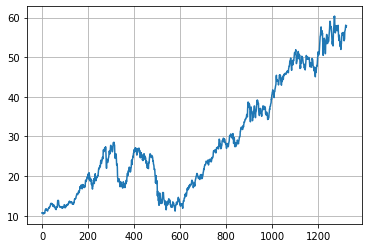

In [15]:
aapl['Close'].plot(grid=True)
plt.show()

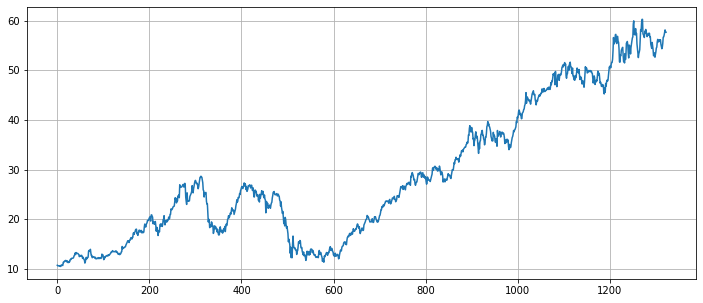

In [16]:
aapl['Open'].plot(grid=True,figsize=(12,5))
plt.show()

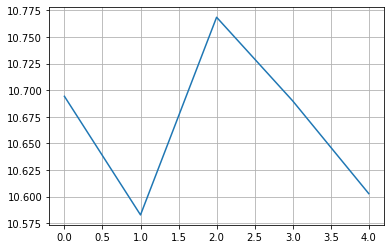

In [17]:
aapl['Close'].head(5).plot(grid=True)
plt.show()

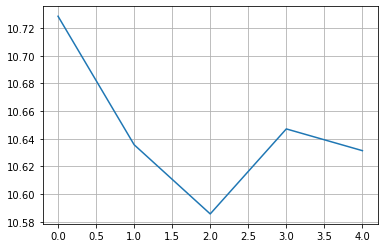

In [18]:
aapl['Open'].head(5).plot(grid=True)
plt.show()

In [19]:
daily_close=aapl[['Adj Close']]
daily_pct_change=daily_close.pct_change()
daily_pct_change.fillna(0, inplace=True)
print(daily_pct_change.head(10))

   Adj Close
0   0.000000
1  -0.010419
2   0.017549
3  -0.007297
4  -0.008152
5   0.005524
6  -0.010988
7  -0.007858
8   0.027721
9  -0.003189


In [20]:
daily_log_returns = np.log(daily_close.pct_change()+1)
print(daily_log_returns.head(10))

   Adj Close
0        NaN
1  -0.010474
2   0.017397
3  -0.007323
4  -0.008185
5   0.005509
6  -0.011048
7  -0.007889
8   0.027344
9  -0.003194


In [21]:
#prefer this method while calculating daily percent change
daily_pct_change = daily_close / daily_close.shift(1) - 1
print(daily_pct_change.head(10))

   Adj Close
0        NaN
1  -0.010419
2   0.017549
3  -0.007297
4  -0.008152
5   0.005524
6  -0.010988
7  -0.007858
8   0.027721
9  -0.003189


In [22]:
daily_log_returns_shift=np.log(daily_close / daily_close.shift(1))
print(daily_log_returns_shift.head(10))

   Adj Close
0        NaN
1  -0.010474
2   0.017397
3  -0.007323
4  -0.008185
5   0.005509
6  -0.011048
7  -0.007889
8   0.027344
9  -0.003194


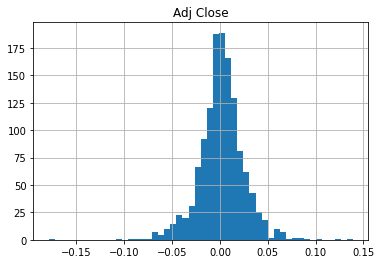

         Adj Close
count  1322.000000
mean      0.001566
std       0.023992
min      -0.179195
25%      -0.010672
50%       0.001677
75%       0.014306
max       0.139049


In [23]:
daily_pct_change.hist(bins=50)
plt.show()
print(daily_pct_change.describe())

In [24]:
cum_daily_return=(1+daily_pct_change).cumprod()
print(cum_daily_return.head(10))

   Adj Close
0        NaN
1   0.989581
2   1.006947
3   0.999599
4   0.991451
5   0.996928
6   0.985974
7   0.978226
8   1.005344
9   1.002137


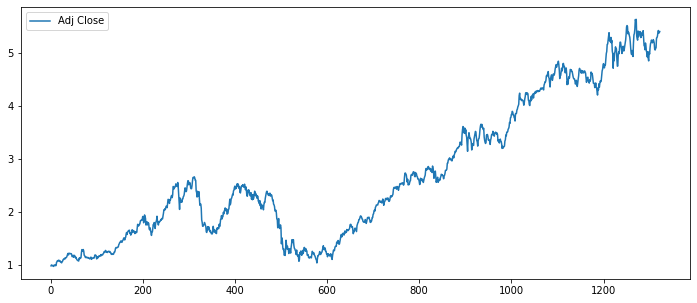

In [25]:
cum_daily_return.plot(figsize=(12,5))
plt.show()

In [53]:
def get(tickers, startdate, enddate):
  def data(ticker):
    return (pdr.get_data_yahoo(ticker, start=startdate, end=enddate))
  datas = map (data, tickers)
  return(pd.concat(datas, keys=tickers, names=['Ticker', 'Date']))

tickers = ['MSFT', 'ORCL', 'GOOG','AAPL','IBM']
all_data = get(tickers, datetime.datetime(2006, 10, 1), datetime.datetime(2012, 1, 1))
print(all_data)

                         High         Low  ...      Volume   Adj Close
Ticker Date                                ...                        
MSFT   2006-10-02   27.490000   27.150000  ...  52908100.0   20.153618
       2006-10-03   27.480000   27.209999  ...  39386200.0   20.160980
       2006-10-04   27.959999   27.370001  ...  82191200.0   20.580849
       2006-10-05   28.110001   27.780001  ...  81967200.0   20.566118
       2006-10-06   28.000000   27.650000  ...  36452200.0   20.529287
...                       ...         ...  ...         ...         ...
IBM    2011-12-23  184.850006  181.889999  ...   3052300.0  135.163544
       2011-12-27  185.850006  184.389999  ...   2775200.0  135.309937
       2011-12-28  185.399994  183.339996  ...   2872000.0  134.607559
       2011-12-29  186.229996  184.009995  ...   2941600.0  136.209763
       2011-12-30  186.479996  183.850006  ...   3530900.0  134.527130

[6615 rows x 6 columns]


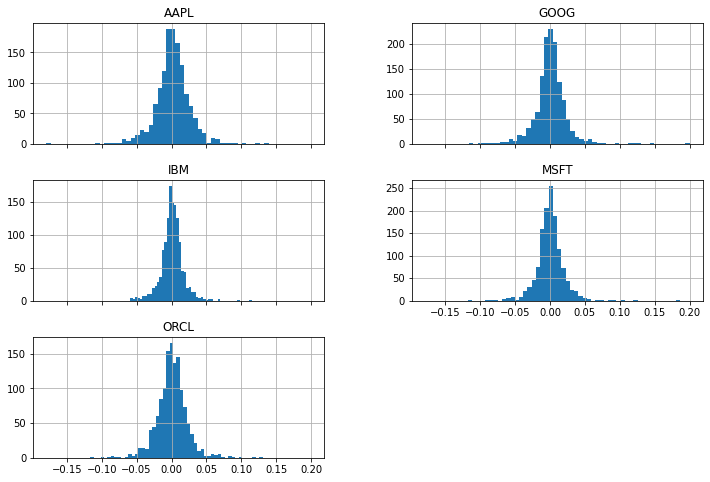

In [54]:
daily_close_nStocks=all_data[['Adj Close']].reset_index().pivot('Date','Ticker','Adj Close')
daily_pct_change=daily_close_nStocks.pct_change()
daily_pct_change.hist(bins=50,sharex=True,figsize=(12,8))
plt.show()

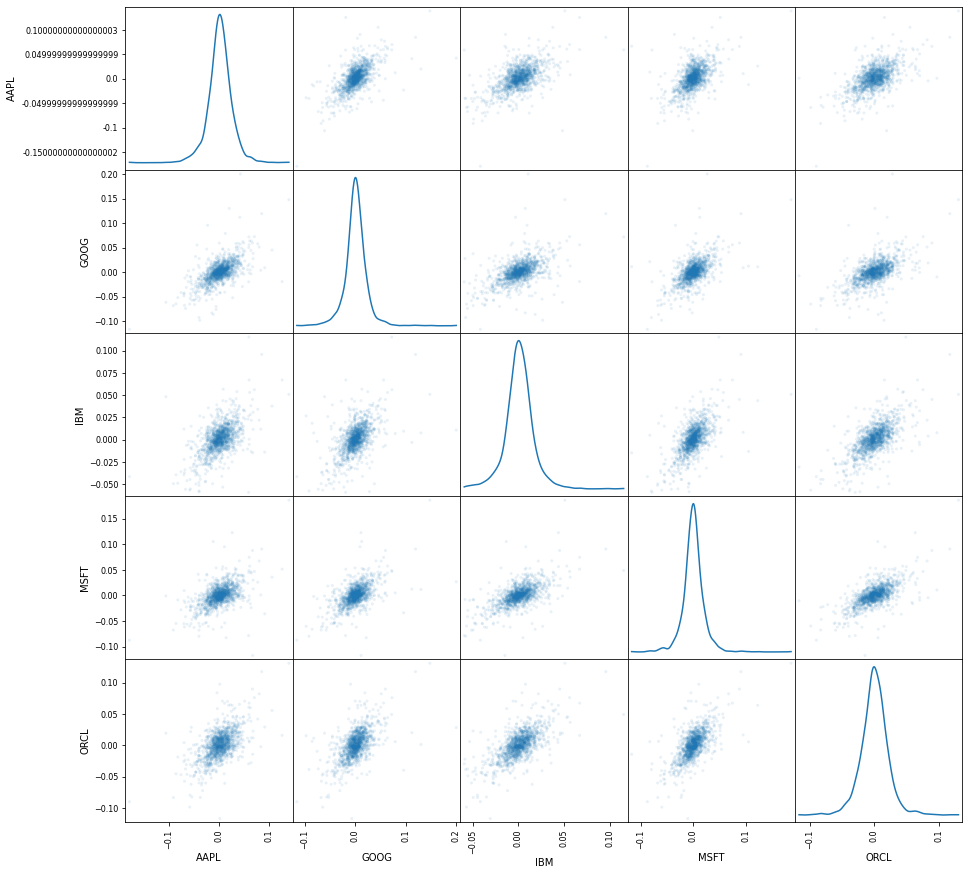

In [55]:
pd.plotting.scatter_matrix(daily_pct_change,diagonal='kde',figsize=(15,15),alpha=0.1)
plt.show()

In [56]:
daily_log_returns=np.log(daily_close_nStocks/daily_close_nStocks.shift(1))
print(daily_log_returns.head(10))

Ticker          AAPL      GOOG       IBM      MSFT      ORCL
Date                                                        
2006-10-02       NaN       NaN       NaN       NaN       NaN
2006-10-03 -0.010474  0.006456 -0.002691  0.000365  0.013498
2006-10-04  0.017397  0.028450  0.017603  0.020612  0.014972
2006-10-05 -0.007323 -0.009402 -0.002169 -0.000716  0.004940
2006-10-06 -0.008185  0.020882  0.002650 -0.001792 -0.003841
2006-10-09  0.005509  0.020012  0.010291 -0.005397  0.019598
2006-10-10 -0.011048 -0.005493  0.002259 -0.001083  0.010190
2006-10-11 -0.007889 -0.000352  0.000000 -0.005432 -0.008574
2006-10-12  0.027344  0.002202  0.006039  0.024392  0.021826
2006-10-13 -0.003194 -0.000328  0.016161  0.005301  0.004204


MOVING WINDOWS

In [57]:
print(all_data[['Adj Close']].rolling(40).var())

                   Adj Close
Ticker Date                 
MSFT   2006-10-02        NaN
       2006-10-03        NaN
       2006-10-04        NaN
       2006-10-05        NaN
       2006-10-06        NaN
...                      ...
IBM    2011-12-23   9.661507
       2011-12-27   9.669571
       2011-12-28   9.664042
       2011-12-29   9.261304
       2011-12-30   9.211816

[6615 rows x 1 columns]


In [58]:
print(all_data[['Adj Close']].rolling(40).std())

                   Adj Close
Ticker Date                 
MSFT   2006-10-02        NaN
       2006-10-03        NaN
       2006-10-04        NaN
       2006-10-05        NaN
       2006-10-06        NaN
...                      ...
IBM    2011-12-23   3.108297
       2011-12-27   3.109593
       2011-12-28   3.108704
       2011-12-29   3.043239
       2011-12-30   3.035097

[6615 rows x 1 columns]


In [59]:
print(all_data[['Adj Close']].rolling(40).mean())

                    Adj Close
Ticker Date                  
MSFT   2006-10-02         NaN
       2006-10-03         NaN
       2006-10-04         NaN
       2006-10-05         NaN
       2006-10-06         NaN
...                       ...
IBM    2011-12-23  136.088735
       2011-12-27  136.056738
       2011-12-28  136.058552
       2011-12-29  136.160173
       2011-12-30  136.172910

[6615 rows x 1 columns]


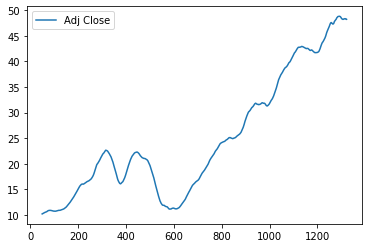

In [60]:
moving_average=aapl[['Adj Close']].rolling(50).mean()
moving_average.plot()
plt.show()

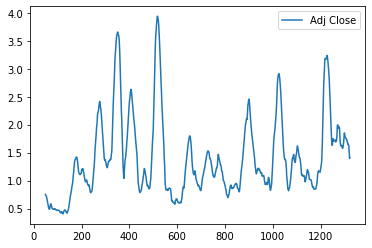

In [61]:
moving_std=aapl[['Adj Close']].rolling(50).std()
moving_std.plot()
plt.show()

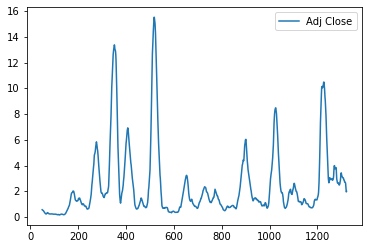

In [62]:
moving_var=aapl[['Adj Close']].rolling(50).var()
moving_var.plot()
plt.show()

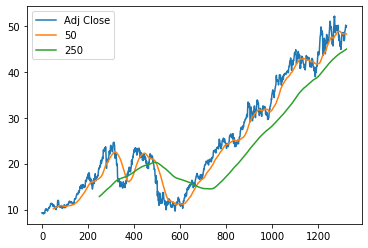

In [63]:
adj_close=aapl[['Adj Close']]
aapl['50']=adj_close.rolling(50).mean()
aapl['250']=adj_close.rolling(250).mean()
aapl[['Adj Close','50','250']].plot()
plt.show()

VOLATILITY CALCULATIONS

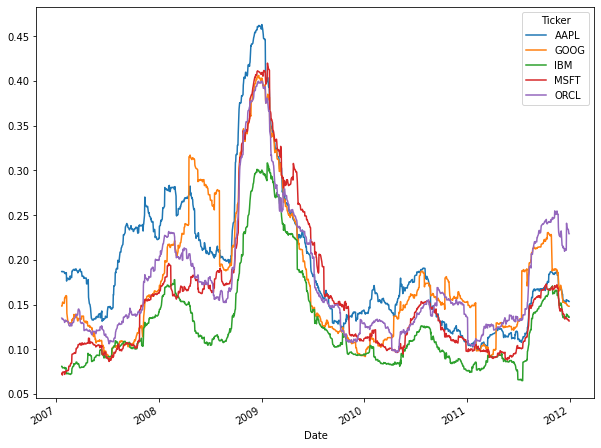

In [64]:
volatility=daily_pct_change.rolling(75).std()*np.sqrt(75)
volatility.plot(figsize=(10,8))
plt.show()

**Ordinary Least-Squares Regression (OLS)**

